# Clickbait Classifier

#### __Gerald Darwin D. Lariosa__

**April 11, 2025**

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import sklearn
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [2]:
nltk.download('wordnet')
stop_words = stopwords.words('english')
lmtzr = WordNetLemmatizer()
vectorizer = TfidfVectorizer()
clf = MultinomialNB()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


&nbsp;

In [3]:
df = pd.read_csv("clickbait_data.csv", header=None)
df.head()

,0,1
0,headline,clickbait
1,Should I Get Bings,1
2,Which TV Female Friend Group Do You Belong In,1
3,"The New ""Star Wars: The Force Awakens"" Trailer...",1
4,"This Vine Of New York On ""Celebrity Big Brothe...",1


In [4]:
df.columns = ['text', 'label']
df.head()

,text,label
0,headline,clickbait
1,Should I Get Bings,1
2,Which TV Female Friend Group Do You Belong In,1
3,"The New ""Star Wars: The Force Awakens"" Trailer...",1
4,"This Vine Of New York On ""Celebrity Big Brothe...",1


In [5]:
df['label'].unique()

array(['clickbait', '1', '0'], dtype=object)

In [6]:
df['label'].value_counts()

label
0            16001
1            15999
clickbait        1
Name: count, dtype: int64

In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df = df.dropna()
df

,text,label
0,headline,clickbait
1,Should I Get Bings,1
2,Which TV Female Friend Group Do You Belong In,1
3,"The New ""Star Wars: The Force Awakens"" Trailer...",1
4,"This Vine Of New York On ""Celebrity Big Brothe...",1
...,...,...
31996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31997,"British Liberal Democrat Patsy Calton, 56, die...",0
31998,Drone smartphone app to help heart attack vict...,0
31999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [9]:
df.duplicated().sum()

0

In [10]:
df[df.duplicated()]

,text,label


In [11]:
df = df.drop_duplicates()
df

,text,label
0,headline,clickbait
1,Should I Get Bings,1
2,Which TV Female Friend Group Do You Belong In,1
3,"The New ""Star Wars: The Force Awakens"" Trailer...",1
4,"This Vine Of New York On ""Celebrity Big Brothe...",1
...,...,...
31996,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31997,"British Liberal Democrat Patsy Calton, 56, die...",0
31998,Drone smartphone app to help heart attack vict...,0
31999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32001 entries, 0 to 32000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    32001 non-null  object
 1   label   32001 non-null  object
dtypes: object(2)
memory usage: 500.1+ KB


In [13]:
df.describe()

,text,label
count,32001,32001
unique,32001,3
top,headline,0
freq,1,16001


In [14]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = nltk.word_tokenize(text)
    tokens = [lmtzr.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [15]:
df['cleaned_text'] = df['text'].apply(clean_text)
df

,text,label,cleaned_text
0,headline,clickbait,headline
1,Should I Get Bings,1,get bings
2,Which TV Female Friend Group Do You Belong In,1,tv female friend group belong
3,"The New ""Star Wars: The Force Awakens"" Trailer...",1,new star war force awakens trailer give chill
4,"This Vine Of New York On ""Celebrity Big Brothe...",1,vine new york celebrity big brother fucking pe...
...,...,...,...
31996,"To Make Female Hearts Flutter in Iraq, Throw a...",0,make female heart flutter iraq throw shoe
31997,"British Liberal Democrat Patsy Calton, 56, die...",0,british liberal democrat patsy calton dy cancer
31998,Drone smartphone app to help heart attack vict...,0,drone smartphone app help heart attack victim ...
31999,"Netanyahu Urges Pope Benedict, in Israel, to D...",0,netanyahu urge pope benedict israel denounce iran


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.3, random_state=42)

In [17]:
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [18]:
clf.fit(X_train, y_train)

MultinomialNB()

In [19]:
nb_predicted = clf.predict(X_test)

In [20]:
cm = confusion_matrix(y_test, nb_predicted)
print(cm)

[[4514  226]
 [ 157 4704]]


<function matplotlib.pyplot.show(close=None, block=None)>

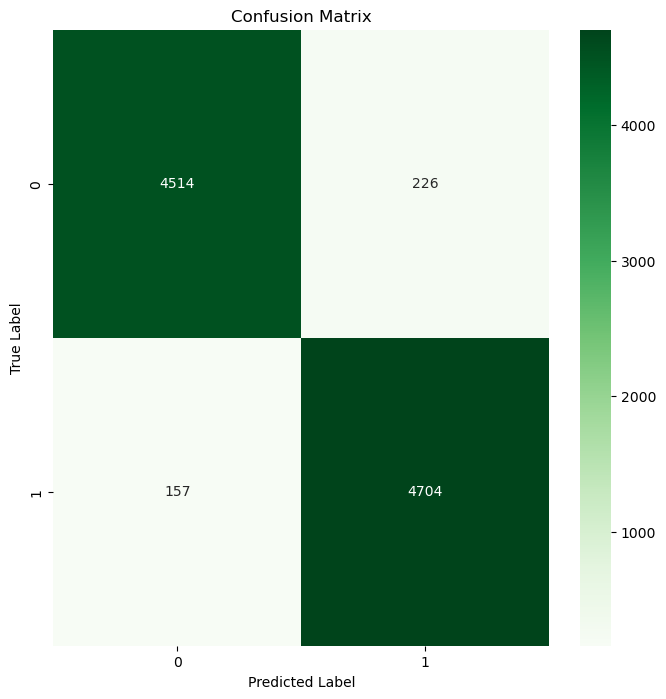

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Greens")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show

In [22]:
print(classification_report(y_test, nb_predicted))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      4740
           1       0.95      0.97      0.96      4861

    accuracy                           0.96      9601
   macro avg       0.96      0.96      0.96      9601
weighted avg       0.96      0.96      0.96      9601

